In [2]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 11.4 MB/s eta 0:00:14
    --------------------------------------- 3.4/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 5.8/150.0 MB 11.4 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/150.0 MB 11.4 MB/s eta 0:00:13
   -- ------------------------------------- 10.5/150.0 MB 11.5 MB/s eta 0:00:13
   --- ------------------------------------ 12.8/150.0 MB 11.3 MB/s eta 0:00:13
   --- ------------------------------------ 14.9/150.0 MB 11.2 MB/s eta 0:00:13
   ---- ----------------------------------- 17.0/150.0 MB 11.1 MB/s eta 0:00:13
   ----- ---------------------------------- 19.1/150.0 MB 10.9 MB/s eta 0:00:13
   ----- ---------------------------------- 21.2/150.0 MB 10.8 MB/s eta 0:00:12
   ------ --------------------------------- 23.6/150.0 MB 10.9 MB/s eta 0:00:12
   ------ --------------------------------- 25.7/150.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [3]:
#load the dataset

X_train = pd.read_csv('data/processed/diabetes_train_processed.csv')
X_test = pd.read_csv('data/processed/diabetes_test_processed.csv')

y_train = X_train.pop('Outcome')
y_test = X_test.pop('Outcome')

In [8]:
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       100
           1       0.64      0.78      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154

ROC-AUC: 0.8318518518518518


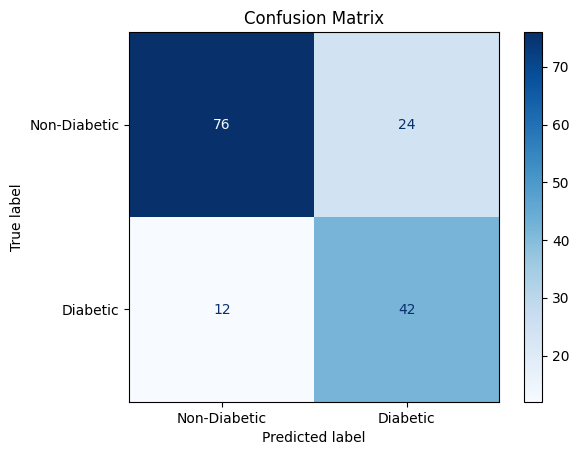

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test = true labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [9]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

ROC-AUC: 0.8214814814814815


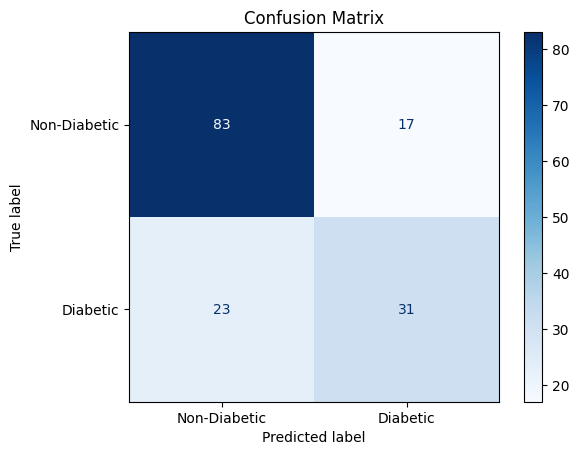

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test = true labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [16]:
xgb = XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
                    eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.8057407407407408


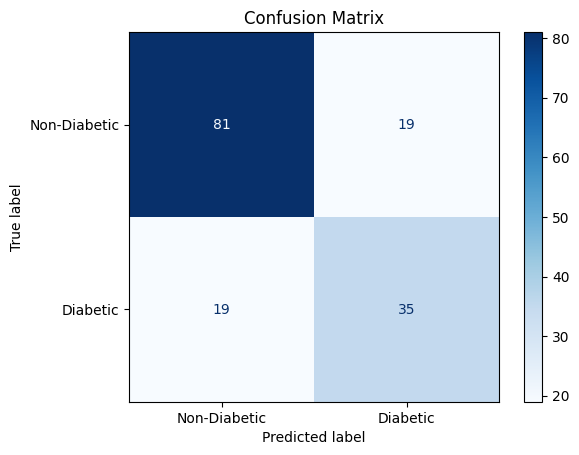

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test = true labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


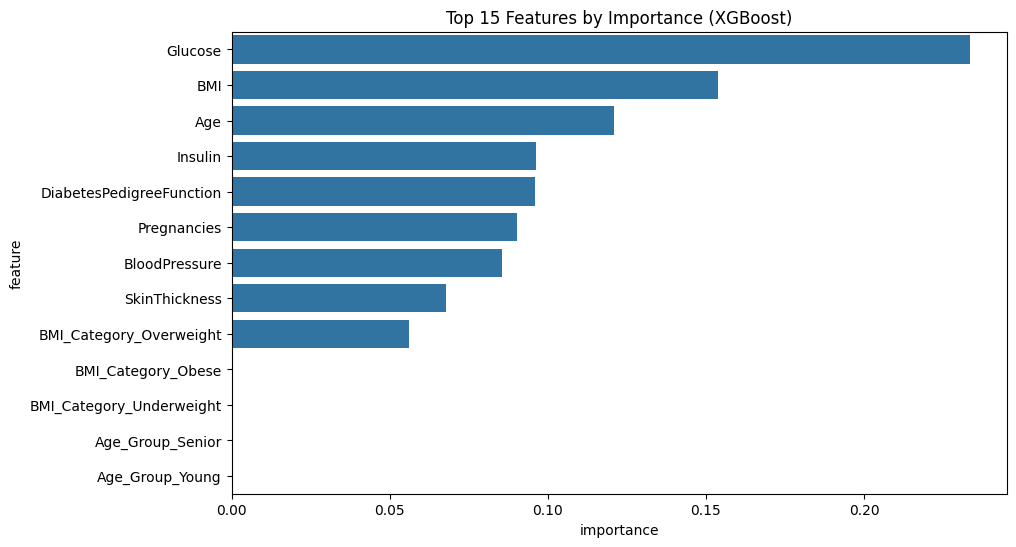

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Features by Importance (XGBoost)')
plt.show()



In [15]:
joblib.dump(xgb, 'models/best_diabetes_model.pkl')
# StandardScaler was already saved as 'models/standard_scaler.pkl' during preprocessing


['models/best_diabetes_model.pkl']